<a href="https://colab.research.google.com/github/Jeetesh-KumarM/CAPSTONE-PROJECT-1/blob/main/Final_Team_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

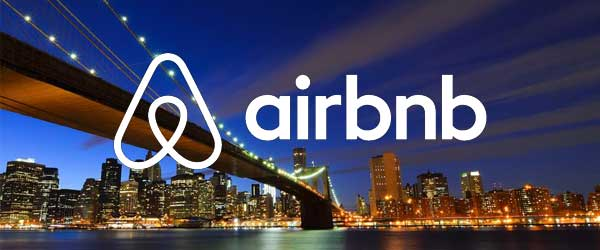

## Before starting let's have a brief look at Airbnb ✈ !

---


So, what **Airbnb** actually is :  
Airbnb is a website for people to list, find and rent lodging.\
                        Quite similar to *Trivago* , *Goibibo* or *OYO* right?? **Well here's the difference:**

*OYO Trivago* or *Goibibo* are a chain of budget and premium rooms partnering with different hotels....  Whereas **Airbnb** is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales . \
\
Today we will be playing with the data set of **Airbnb** for **New York City** and will try to gather as much intel as we can, so lets put a stop to this introduction part lets start **EXPLORING** !! \
                        



---



In [ ]:
# Importing necessary Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/First Capstone EDA Project/Airbnb csv/Airbnb NYC 2019.csv'
df = pd.read_csv(path)

Mounted at /content/drive




---



# **DATA ANALYZING**

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

From this part we can conclude that there are a lot of NULL values in **last_reviews** and **reviews_per_month** column .... there are few in **name** and **host_name** column , **id** is should be unique for every element.

In [ ]:
# Lets check the total number of null values in each column:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Here, we can see the exact number of null values from each column 

In [ ]:

def check(x):
    if 0 in x.values:
      return "0 is present"
    else:
      return "0 is absent"
#Price Values
print("Price Column")
print("\t",check(df['price']))
#Minimum Nights Values
print("\nMinimum Nights Column")
print("\t",check(df['minimum_nights']))
#Number of Reviews Values
print("\nNumber of reviews Column")
print('\t',check(df['number_of_reviews']))
#Last Review Values
print("\nLast review Column")
print("\t",check(df['last_review']))
#Reviews per Month Column
print("\nReviews Per Month Column")
print("\t",check(df['reviews_per_month']))
df['reviews_per_month'].fillna(0,inplace=True)

Price Column
	 0 is present

Minimum Nights Column
	 0 is absent

Number of reviews Column
	 0 is present

Last review Column
	 0 is absent

Reviews Per Month Column
	 0 is absent


In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


And from this part we can see that there are listings with **0** values like **price** or **number_of_reviews** , rest seems fine in terms of
 missing data ..for now

Lets check for any duplicate data just in case !

In [ ]:
identical_data = df.duplicated()
print(identical_data.sum())


0




---



# **DATA CLEANING**

 Instead of dropping **name** and **host_name** columns I am here replacing them with 'Unknown' and 'Host_Unknown' 

In [ ]:
# Replacing:

df['name'].fillna('Unknown',inplace=True)
df['host_name'].fillna('Host_Unknown',inplace=True)

Replacing Null values in **reviews_per_month** column with **0** as we have to assume not giving any reviews is qual to **0** in this case...

In [ ]:
# Replacing with 0:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


Lets again check for any null values in any column..

In [ ]:
# Cross-checking:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**last_review** column will help with the DateTime Stamp

### Also there were some outliers in the **price** column , lets deal with them..

In [ ]:
# Checking:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


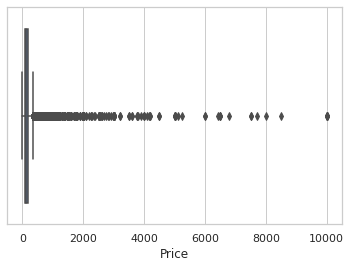

In [ ]:
# Creating Box Plot:

sns.set_theme(style = 'whitegrid')
# df['price'].plot(kind = 'box')         # Box-plot creation using matplotlib
sns.boxplot(df['price'])

plt.ylabel('')
plt.xlabel('Price')
plt.show()

This box-plot shows the presence of a large number of **outliers** , we cannot even determine the mean here...



---



### One way of dealing with the outliers is to filter out the values using **quantile**(percentile) approach ! 
### Here ,  i've selected only the values from **price** column which are between **0.01** to **98** percentile of the  entire **price** column

In [ ]:
# Defining 0.1 and 98 percentile values from 'price' column:

min_threshold , max_threshold = df.price.quantile([0.001 , 0.980])
min_threshold , max_threshold

(18.0, 550.0)

In [ ]:
# Spectating values below min_threshold:

df[df.price < min_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,NaN,0.00,4,137
4647,3258197,Large 1br Duplex in Heart of Upper East Side,16477306,Jeff,Manhattan,Upper East Side,40.76866,-73.95553,Entire home/apt,16,2,21,2019-06-30,1.69,1,9
5542,4031809,Prewar classic NYC apartment.,20902552,Miquel,Manhattan,Washington Heights,40.83456,-73.94344,Private room,16,14,0,NaN,0.00,1,0
8169,6301965,Beautiful SoHo Loft,655506,Silvia,Manhattan,SoHo,40.72340,-73.99967,Entire home/apt,16,3,3,2018-01-08,0.16,1,0
8270,6364324,The Oasis.,33106693,Elena,Manhattan,Harlem,40.82159,-73.95013,Private room,16,2,43,2019-07-01,1.66,3,154
20992,16620607,Spacious and Modern 2 Bedroom Apartment,109725962,Erika,Brooklyn,Bushwick,40.68994,-73.91556,Entire home/apt,11,2,113,2019-06-22,3.86,1,261
21281,16927533,Studio with amazing view,3737986,Carolann,Manhattan,Financial District,40.70588,-74.01590,Entire home/apt,12,300,0,NaN,0.00,1,0
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,Manhattan,Harlem,40.81302,-73.95349,Shared room,10,1,0,NaN,0.00,1,0
22261,17952277,"Newly renovated, fully furnished room in Brooklyn",62685070,Katie,Brooklyn,Bushwick,40.69974,-73.91935,Private room,10,5,0,NaN,0.00,1,0
22287,17979764,Jen Apt,84497333,Jennifer,Manhattan,SoHo,40.72237,-73.99817,Private room,10,5,2,2017-04-15,0.07,1,0


Now, lets create a new data frame with values of **price** column between **min_threshold** and **max_threshold**

In [ ]:
#Creating a new data frame: 

df2 = df[(df.price>min_threshold)&(df.price<max_threshold)]
df2.shape

(47859, 16)

In [ ]:
# Checking variations:
df2['price'].describe()

count    47859.000000
mean       132.137320
std         89.038513
min         19.000000
25%         69.000000
50%        102.000000
75%        174.000000
max        549.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


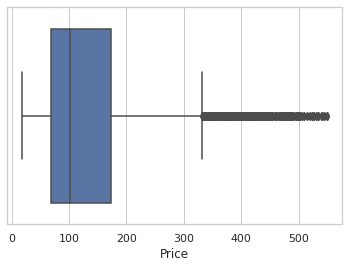

In [ ]:
#Creating Box-plot again: 

sns.set_theme(style = 'whitegrid')
sns.boxplot(df2['price'])
plt.ylabel('')
plt.xlabel('Price')
plt.show()

Presence of a lot of **outliers** can still be seen here, but atleast we have dealt with the *most extreme values* and also **mean** along with the **Quartiles** are now visible !

We cannot remove other **outliers** for now as removing them may affect other columns and hence the **entire data frame** a bit...


**IF REQUIRED**: we can later remove the outliers using Interquartile Range(IQR) Formula 
which is: \
 **Interquartile range = Upper Quartile – Lower Quartile**


As we are done with the **Basic Analysis** and **Data Cleaning** let us now deep dive into the data and gather some really useful information !!



---



## The Other way of dealing with outliers is replacing the 0 value of price according to its respective neighbourhood_group and its respective room_type

In [ ]:
df3=df.copy()

In [ ]:
areas_price = df3.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
areas_price

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [ ]:

df_z=df3[df3['price']==0] # TABLE WITH PRICE AS 0
df_z

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimum_price


In [ ]:

#Replace 0 with mean value
for index, row in df3.iterrows():
    if row['price']==0:
      for i,r in areas_price.iterrows():
        if row['neighbourhood_group']==r['neighbourhood_group'] and row['room_type']==r['room_type']:
          #row['price']=r['price']
          df3.replace(row['price'],r['price'],inplace=True)

In [ ]:

#The table has no 0 values
df3[df3['price']==0] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [ ]:

print("Before Updating price:",df.loc[23161].price)
print("After Updating price:",df3.loc[23161].price)

Before Updating price: 0
After Updating price: 76.500098697197


The above output confirms that the value 0 is no longer present in **price** column

### Before diving in let us first have a look at **correlations** among different column values:

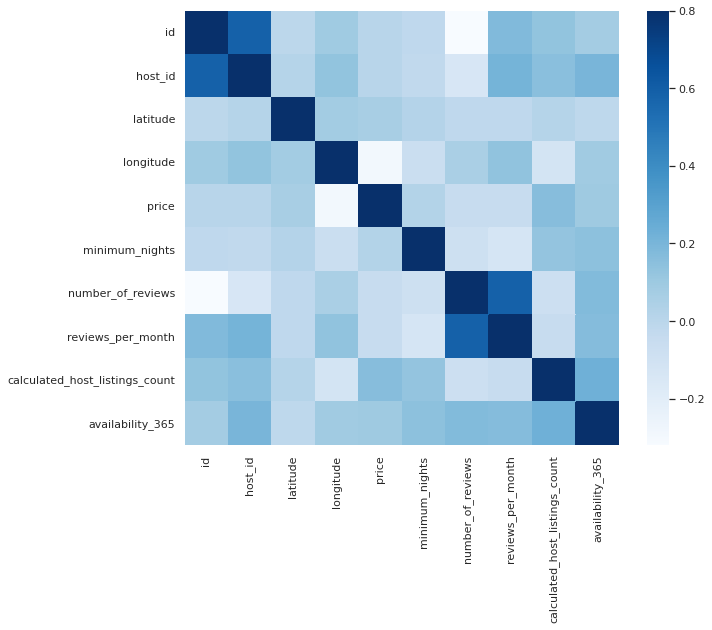

In [ ]:
#correlation matrix
corrmat = df2.corr()
h, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True , cmap="Blues");

From the **heatmap** we can see the correlation between different columns that can affect a airbnb listing.

Also.... There's correlation among **host_id to reveiws_per_month** **&** **availability_365**. And there's noticiable correlation between **min_nights to no_of_listings_count & availability_365**. Price also shows some correlation with availability_365 & host_listings_count.

**no_of_reviews and reviews_per_month** gives almost the same information. 



## Now ,let us have a look at the *hosts* and *areas* and see what can we conclude from that..

In [ ]:
# Lets get an idea about the general shape of the dataframe.
df.shape

(48895, 16)

In [ ]:
# Let us find unique areas in data using 'neighbourhood_group'column.
df.neighbourhood_group.unique() 

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
df['host_name'].value_counts().reset_index()

,index,host_name
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
...,...,...
11448,Rhonycs,1
11449,Brandy-Courtney,1
11450,Shanthony,1
11451,Aurore And Jamila,1


In [ ]:


# Lets make a group and see which hosts has visited which areas the most.
hostArea = df.groupby(['host_id' , 'host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hostArea.sort_values(by = 'calculated_host_listings_count', ascending = False).head(10)

,host_id,host_name,neighbourhood_group,calculated_host_listings_count
34757,219517861,Sonder (NYC),Manhattan,327
29494,107434423,Blueground,Brooklyn,232
29495,107434423,Blueground,Manhattan,232
19636,30283594,Kara,Manhattan,121
31172,137358866,Kazuya,Brooklyn,103
31173,137358866,Kazuya,Manhattan,103
31174,137358866,Kazuya,Queens,103
12846,12243051,Sonder,Manhattan,96
14482,16098958,Jeremy & Laura,Manhattan,96
25743,61391963,Corporate Housing,Manhattan,91


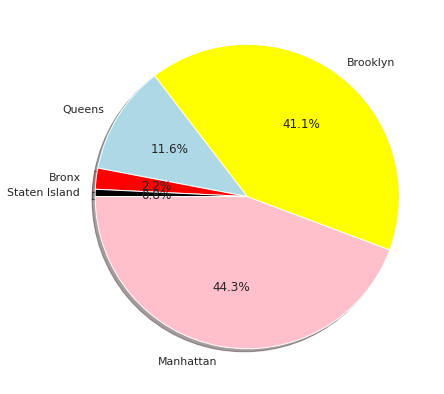

In [ ]:
# MUSKAN

#Visualise number of  neighbourhood_group	 in different locations with help of pie chart
plt.figure(figsize=(15,7))
plt.title=("neighbourhood group")
g=plt.pie(df.neighbourhood_group.value_counts(),labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%',shadow= True, colors= ['pink', 'yellow', 'lightblue','red','black',] , startangle=180,)
plt.show()

Preffered types of rooms by hosts are shown below:

In [ ]:
#counting the type of rooms preferred by the people
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

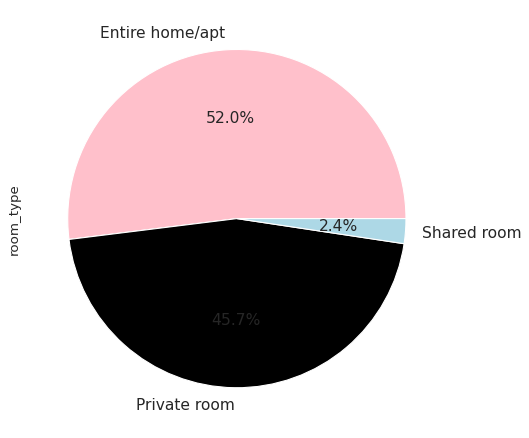

In [ ]:
#plotting the types of room preferred by the people
plt.figure(figsize=(10,7), dpi=80)

df['room_type'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors = ['pink', 'black','lightblue'],startangle=360,fontsize=14)

##Here are some Observations that are worth noting:
1. After checking the pie chart is clearly understandable that 
2. "Manhattan" and "Brooklyn" are the most visited places by the hosts.
3. After this we have "Queens" and then rest of the places.
4. ok, We could also see that majority of the hosts prefer to book 
5. Entire home/apartmnet then private rooms and thenfinally shared rooms.



---



## Let us now perform some **Bivariate Analysis:**
 (compairing two different variables to study their relationship)

**What can we learn from predictions? (ex: locations, prices, reviews, etc)**

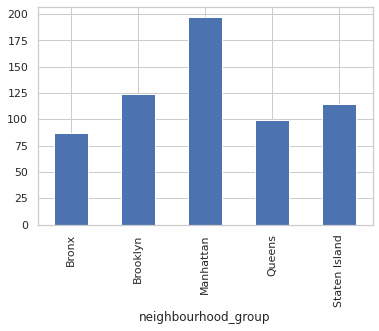

In [ ]:

neighbhourhhod_Price=df.groupby('neighbourhood_group')['price'].mean()
neighbhourhhod_Price.plot.bar()


**We can see Brooklyn has the highest number of Reviews**

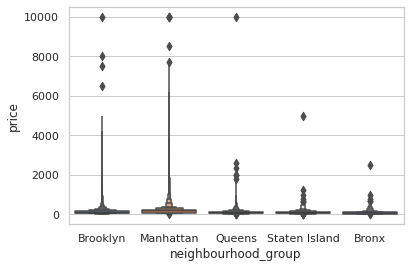

In [ ]:

sns.boxenplot(x="neighbourhood_group", y="price", data=df);

It is cear that **Manhattan** has the highest average of price followed by **Brooklyn** ,
**Queens** and **Staten Island** \
 We can say that **Bronx** is the most affordable or the cheapest one in the entire neighbourhood_group in NYC !

<Figure size 720x360 with 0 Axes>

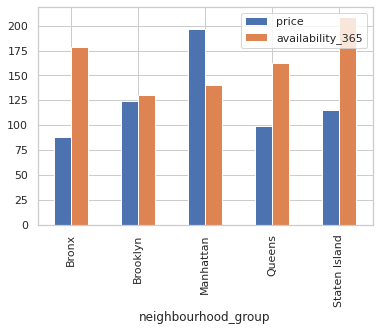

In [ ]:

#A new column minimum_price is added which is the product of minimum_nights and price
df3['minimum_price']=df3['minimum_nights']*df3['price']
df4=df3.groupby(['neighbourhood_group']).agg({'price':'mean','availability_365':'mean'})#Mean price and mean availability of each neighbourhood group
plt.figure(figsize=(10,5))
df4.plot.bar()

**SO ACCORDING TO THE GRAPH ABOVE, THE AVERAGE PRICE AND AVERAGE AVAILABILITY IN *BRONX*,*QUEENS*,*STATEN* *ISLAND* AND *BROOKLYN* SUITED BEST FOR A CUSTOMER WHEREAS IN *MANHATTAN* THE AVERAGE PRICE IS THE HIGHEST AND AVERAGE AVAILABILITY IS THE SECOND LEAST**

In [ ]:
# neighbourhood_groups vs number_of_reviews:

areas_reviews = df2.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


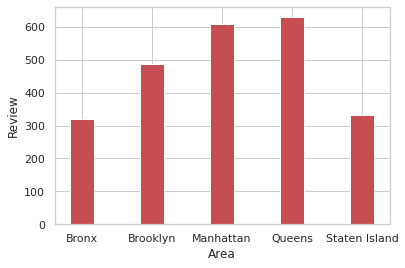

In [ ]:
# Graph Plot:

area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']
plt.bar(area, review, color ='r', width = 0.35)
plt.xlabel("Area")
plt.ylabel("Review")
plt.show()

By reviews....\
We can assume that people like staying in **Queens** the most , followed by **Manhannat** (even after charging the most out of people !! ) , **Brooklyn** and others


Review per Month Analysis

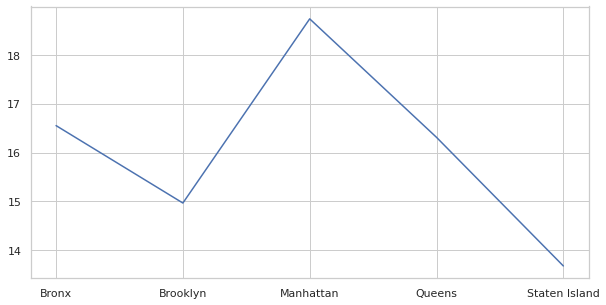

In [ ]:

rev=df3.groupby(['neighbourhood_group']).agg({'reviews_per_month':"mean"})
rev1=rev.sort_values('reviews_per_month', ascending=False)
fig=plt.figure(figsize=(10,5))
plt.plot(rev)

Reviews per Month is highest in Manhattan (might be because it has the highest listing) followed by Bronx,Queens,Broonkyl and at last Staten Island (has the least number of listing).

Traffic of Customers During different Time Period

Text(0, 0.5, 'Frequency')

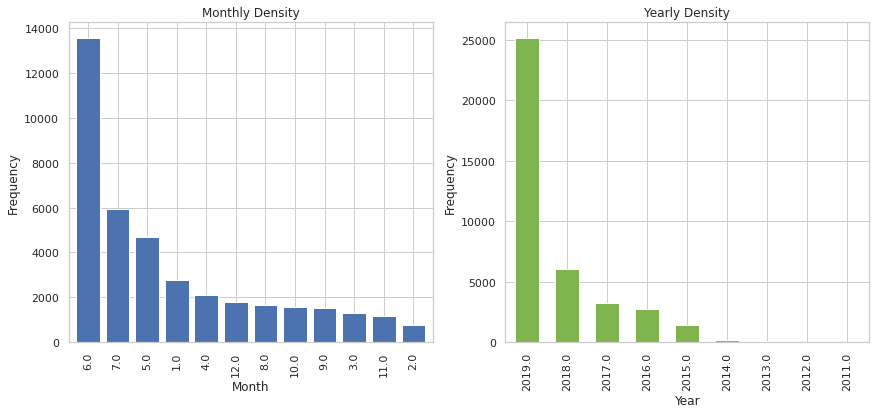

In [ ]:

df['last_review']= pd.to_datetime(df['last_review'])
#Monthly
df['month'] = pd.DatetimeIndex(df['last_review']).month
plt.figure(figsize=(30,20))
plt.subplot(341)
x=df['month'].value_counts().plot.bar(title='Monthly Density',width = 0.8)
plt.xlabel('Month')
plt.ylabel('Frequency')
#Yearly
plt.subplot(342)
df['year']=pd.DatetimeIndex(df['last_review']).year
df['year'].value_counts().plot.bar(title='Yearly Density',width = 0.6,color = '#7eb54e')
plt.xlabel('Year')
plt.ylabel('Frequency')

2019 WAS THE BUSIEST OF ALL YEARS WHEREAS 2011 AND 2012 WAS THE LEAST.

JUNE WAS THE BUSIEST MONTH FOLLOWED BY JULY WHEREAS FEBRUARY WAS THE LEAST BUSY.

In [ ]:

#Details of the latest Airbnb Booked
df.iloc[df["last_review"].argmax()]

id                                             100184
name                                        Bienvenue
host_id                                        526653
host_name                                Host_Unknown
neighbourhood_group                            Queens
neighbourhood                          Queens Village
latitude                                     40.72413
longitude                                   -73.76133
room_type                                Private room
price                                              50
minimum_nights                                      1
number_of_reviews                                  43
last_review                       2019-07-08 00:00:00
reviews_per_month                                0.45
calculated_host_listings_count                      1
availability_365                                   88
month                                             7.0
year                                           2019.0
Name: 360, dtype: object



---



## Time to gather some intel about Airbnb **Hosts** in New York City

In [ ]:
# Fetching top 10 Hosts with most number of listing in NYC:

listing_hosts=df2['host_name'].value_counts().head(10)
listing_hosts

Michael         407
David           390
Sonder (NYC)    317
John            287
Alex            274
Blueground      232
Sarah           227
Daniel          222
Maria           201
Jessica         196
Name: host_name, dtype: int64

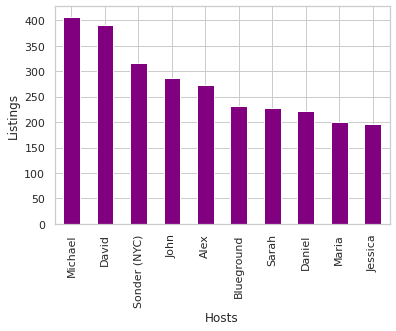

In [ ]:
# Plotting a graph for the same:

listing_hosts.plot(kind='bar',color='purple')
plt.xlabel('Hosts')
plt.ylabel('Listings')
plt.show()

From the above data , we can say that **Michael** holds the most number of listings *i.e* 407 in New York city in **Airbnb** !! 

Which obviously makes him the most busy host of **NYC** \
In order to maintain all these *listings* ofcourse he has to contribute a lot of his time.

In [ ]:
#  Fetching Top 10 Hosts with most number of reviews from people:

review_hosts = df2.groupby(['host_name'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews' , ascending = False).head(10)
review_hosts

,host_name,number_of_reviews
2612,Dona,629
4867,Jj,607
6894,Maya,543
1642,Carol,540
2252,Danielle,510
917,Asa,488
10686,Wanda,480
6077,Linda,474
2235,Dani,467
648,Angela,466


TypeError: ignored

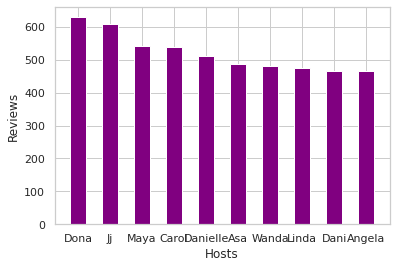

In [ ]:
# Plotting a graph for the same:

host = review_hosts['host_name']
review = review_hosts['number_of_reviews']

 
plt.bar(host, review, color ='purple', width = 0.5)
 
plt.xlabel("Hosts")
plt.ylabel("Reviews")
plt.title("Top 10 Hosts of New York City on the basis of Reviews")
plt.show()

So the people's favourite Host is now revealed....\
 
 ▶**Dona** 

From the above graph we can see that most of the people have reviewd him for his job !!  
folowed by Jj and others...



---



### We should now try to look at the **Total Percentage** of each **Room Type** and **Neighbourhood group** in the entire **New York City** available in the data set !!

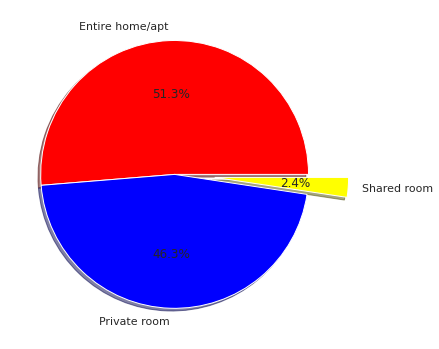

In [ ]:
# Pie plot for room_type:

plt.figure(figsize=(6,7))
c = ['red' , 'blue' , 'yellow']
ex = [0.0 ,0.0 ,0.3]
plt.pie(list(df2['room_type'].value_counts()),labels=list(df2['room_type'].value_counts().keys()),autopct='%0.1f%%' , colors = c , explode = ex, shadow=True)
plt.show()

So the percentage of **Shared room** available in the entire NYC is very less as compared to **Entire home/apt** and **Private room**

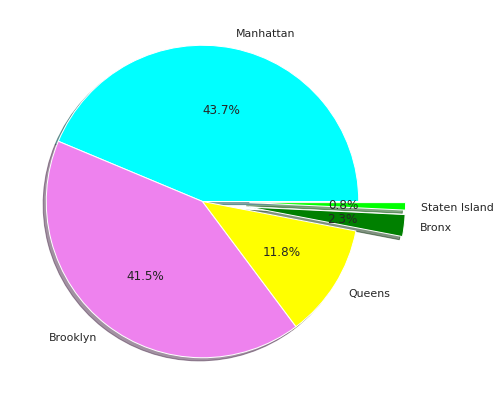

In [ ]:
# pie_plot for neighbourhood_groups:

plt.figure(figsize=(7,9))
c = ['cyan' , 'violet' , 'yellow' , 'green' , 'lime']
ex = [0.0 ,0.0 ,0.0, 0.3 ,0.3]
plt.pie(list(df2['neighbourhood_group'].value_counts()),labels=list(df2['neighbourhood_group'].value_counts().keys()),autopct='%0.1f%%' ,colors = c , explode = ex ,shadow=True)
plt.show()

Here we can see that the percentage of listings in **Staten island** and **Bronx** is the lowest as compared to other neighbourhood groups in the entire NYC !!



---



## Lets perform some **Multi Variate Analysis** some information about the **Traffic of People** among these neighbouring cities , room types & availability in New York City !

**Multi Variate Analysis**: is quite similar to Bi Variate Analysis but here we compare more than 2 variables at once

### Lets first check the **listing count** of every room type in each neighbourhood_group in NYC !

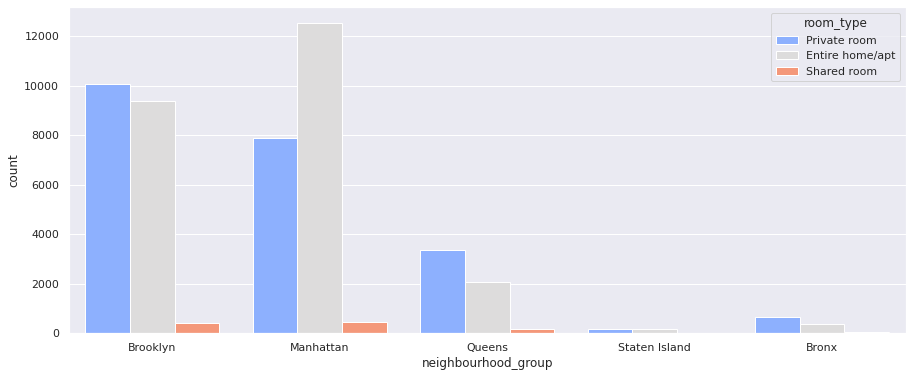

In [ ]:
# room_type vs neighbourhood_group (listing's count)

plt.figure(figsize = (15,6))
sns.countplot(x ='neighbourhood_group', hue = "room_type", data = df2 , palette = 'coolwarm' , saturation = 1)
plt.show()

Okay, so the number of listings for **Entire home/apt** is maximum in **Manhattan** with  **≈13000 counts** followed by **Brooklyn** , Queens , Bronx and the least in **Staten Island**

About listings for **Private room**, **Brooklyn** is at the top with **≈10000 counts** followed by **Manhattan** , Queens , Bronx and **Staten island** with the least count

**Shared room's** count is very less in the mentioned neighbourhood_groups with **Manhattan** at the top with **≈400 counts** followed by Brooklyn , Queens and then **Bronx** and **Staten island** with almost negligible Shared rooms

### Checking **average minimum_nights** spent in all room_types in each neighbourhood_group

In [ ]:
# Grouping by room_type & neighbourhood_group and checking average minimum_nights spent:

room_neighbour_nights = df2.groupby(['room_type' , 'neighbourhood_group'])['minimum_nights'].mean().reset_index().round(1)
room_neighbour_nights

,room_type,neighbourhood_group,minimum_nights
0,Entire home/apt,Bronx,6.0
1,Entire home/apt,Brooklyn,6.6
2,Entire home/apt,Manhattan,10.6
3,Entire home/apt,Queens,5.2
4,Entire home/apt,Staten Island,6.3
5,Private room,Bronx,3.9
6,Private room,Brooklyn,5.5
7,Private room,Manhattan,5.4
8,Private room,Queens,5.0
9,Private room,Staten Island,3.6


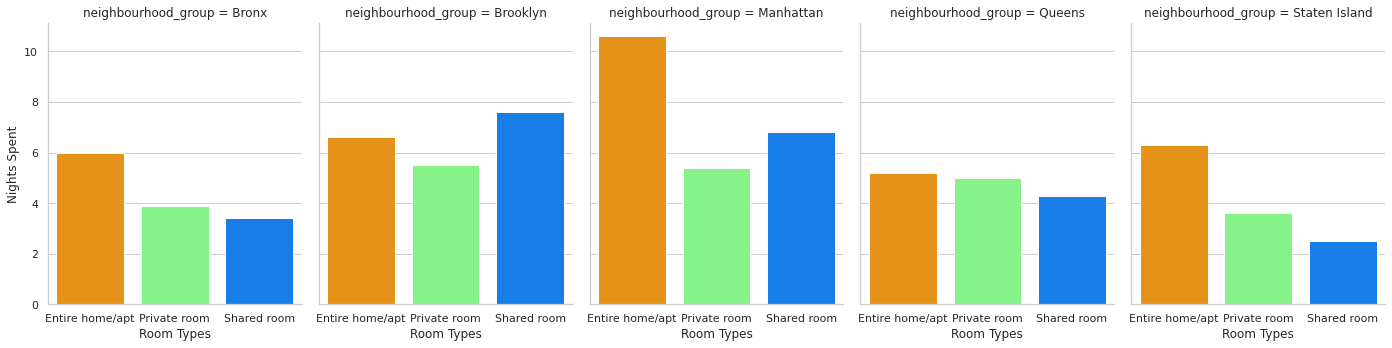

In [ ]:
#room_type vs neighbourhood_groups vs minumum_nights:

g = sns.catplot(x="room_type", y="minimum_nights", col="neighbourhood_group",
                data=room_neighbour_nights, saturation=.8,
                kind="bar", aspect=.78 , palette = 'jet_r')
(g.set_axis_labels("Room Types", "Nights Spent")
  .set_xticklabels(["Entire home/apt", "Private room", "Shared room"])) 
plt.show()

**Manhattan** comes on Top with **Entire home/apt** where people have spent most of their nights ≈11 followed by Brooklyn and Staten Island with almost same number of average nights ≈7 and then Queens and Bronx with ≈6 average nights spent by peope.

For **Private rooms** people have spent most of their nights in Brooklyn and Manhattan ≈6 then in Queens ≈5 followed by Bronx and Staten island with ≈4 average nights spent.

In case of **Shared rooms** people have spent most of their nights in Brooklyn ≈8 then in Manhattan ≈7 followed by Queens with ≈5 average nights and Bronx and Staten Island with ≈3,4 average nights spent by people in NYC !

### Lets check the **Average Price Distribution** in all neighbourhood_groups for each room type

In [ ]:
# Grouping by room_type and neighbourhood_group and checking price:

room_neighbour_price = df2.groupby(['room_type' , 'neighbourhood_group'])['price'].mean().reset_index().round(2)
room_neighbour_price

,room_type,neighbourhood_group,price
0,Entire home/apt,Bronx,122.49
1,Entire home/apt,Brooklyn,160.41
2,Entire home/apt,Manhattan,205.01
3,Entire home/apt,Queens,139.37
4,Entire home/apt,Staten Island,124.84
5,Private room,Bronx,61.45
6,Private room,Brooklyn,71.53
7,Private room,Manhattan,103.78
8,Private room,Queens,67.04
9,Private room,Staten Island,62.29


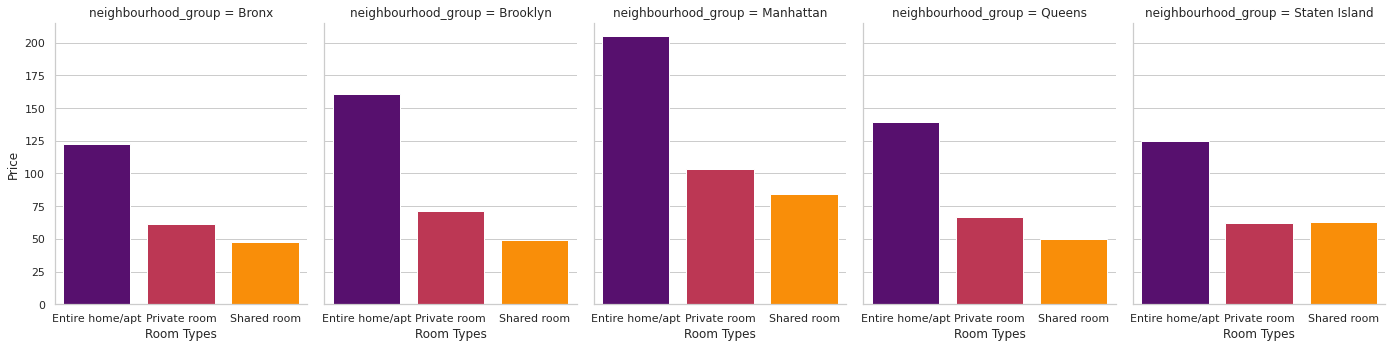

In [ ]:
#room_type vs neighbourhood_groups vs price:

g = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=room_neighbour_price, saturation=1,
                kind="bar", aspect=.78 , palette = 'inferno')
(g.set_axis_labels("Room Types", "Price")
  .set_xticklabels(["Entire home/apt", "Private room", "Shared room"])) 
plt.show()

From the above graph we have all the information regarding **average price** for each room type in each neighbourhood_group in NYC !

For **Entire home/apt** Manhattan is the most expensive choice with the average price of ≈206 and Bronx is the cheapest with the cost of ≈123

For **Private rooms** in NYC, Manhattan is again the most expensive with the average price of ≈104 and Bronx is the cheapest with ≈62

For **Shared rooms** Manhattan is still at the top with the average price of ≈85 and Bronx is the cheapest with price ≈48


### Time to check the  **Average Availability** of all room types in each neighbourhood_group in New York City !

In [ ]:
# Grouping by room_type and neighbourhood_group and checking availability:

room_neighbour_availability = df2.groupby(['room_type' , 'neighbourhood_group'])['availability_365'].mean().reset_index().round(1)
room_neighbour_availability

,room_type,neighbourhood_group,availability_365
0,Entire home/apt,Bronx,158.4
1,Entire home/apt,Brooklyn,95.8
2,Entire home/apt,Manhattan,113.9
3,Entire home/apt,Queens,130.6
4,Entire home/apt,Staten Island,175.9
5,Private room,Bronx,171.5
6,Private room,Brooklyn,99.8
7,Private room,Manhattan,100.4
8,Private room,Queens,149.3
9,Private room,Staten Island,226.4


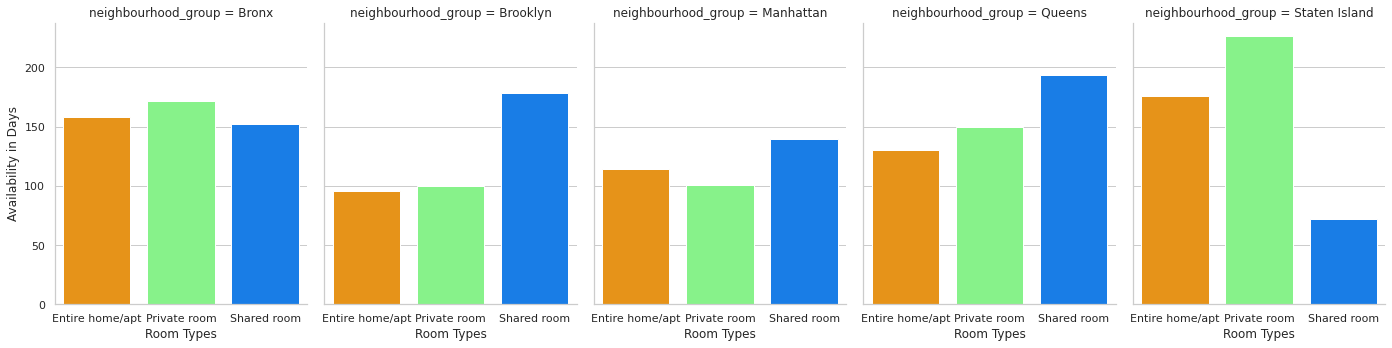

In [ ]:
#room_type vs neighbourhood_groups vs availability:

g = sns.catplot(x="room_type", y="availability_365", col="neighbourhood_group",
                data=room_neighbour_availability, saturation=.8,
                kind="bar", aspect=.78 , palette = 'jet_r')
(g.set_axis_labels("Room Types", "Availability in Days")
  .set_xticklabels(["Entire home/apt", "Private room", "Shared room"])) 
plt.show()

**Staten island** comes on Top in terms of providing **Entire home/apt's** availability with ≈178 days followed by Bronx and we have Brooklyn with least availability of Entire home/apt's availability with average days of ≈96 in a year.

**Private rooms** are available most of the time in **Staten island** again with average days of ≈227 followed by other neighbourhood_groups with Brooklyn coming at the end with average days availability of ≈100 days a year.

For **Shared rooms** , **Queens** is active most of the time in a year with ≈194 days followed by other cities and Staten island with the least availability of Shared rooms in a year with ≈72 days.



---



### Lets now try to find out people's favourites using their **number_of_reviews** ...

**TOP 10 LISTINGS-----**

In [ ]:
# Top 10 listings:

listing_review = df2.groupby([ 'name'])['number_of_reviews'].sum().reset_index().round(1).sort_values(by = 'number_of_reviews' , ascending = False).head(10)
listing_review

,name,number_of_reviews
32040,Private Bedroom in Manhattan,666
35742,Room near JFK Queen Bed,629
5513,Beautiful Bedroom in Manhattan,617
20433,Great Bedroom in Manhattan,607
35388,Room Near JFK Twin Beds,576
39694,Steps away from Laguardia airport,543
27090,Manhattan Lux Loft.Like.Love.Lots.Look !,540
14896,Cozy Room Family Home LGA Airport NO CLEANING FEE,510
33322,Private brownstone studio Brooklyn,488
25266,Loft Suite @ The Box House Hotel,481


Okay so **Private Bedroom in Manhattan** seems to be the most popular listing in the entire New York City with a total of 666 reviews !!

### For a bit deeper information, lets have a look at **TOP 10 listing's names** again but this time lets rank them according to **monthly reviews** 

**TOP 10 LISTINGS (MONTHLY_REVIEWS)-----**

In [ ]:
# TOP 10 LISTINGS (MONTHLY_REVIEWS):

name_month_review = df2.groupby([ 'name'])['reviews_per_month'].sum().reset_index().round(1).sort_values(by = 'reviews_per_month' , ascending = False).head(10)
name_month_review

,name,reviews_per_month
18151,Enjoy great views of the City in our Deluxe Room!,58.5
20560,Great Room in the heart of Times Square!,28.0
21943,Home away from home,21.1
25365,Lou's Palace-So much for so little,20.9
22975,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.8
22967,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.8
22969,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.8
32421,Private Room,16.8
14896,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.2
21304,Harlem Gem,16.1


**Enjoy great views of the City in our Deluxe Room!** is at the top \

We can clearly see that there is a considerable amount of difference between listings as per total reviews and reviews/month...

Also if **Enjoy great views of the City in our Deluxe Room!** keeps this performance they will very soon surpass **Private Bedroom in Manhattan** as they are not even in the top 10 listings as per monthly reviews whereas **Enjoy great views of the City in our Deluxe Room!** is at the top !!


**Conclusion**:  
**Private Bedroom in Manhattan** needs to work upon their performance or else their position will soon be lost to **Enjoy great views of the City in our Deluxe Room!**

**TOP 10 NEIGHBOURHOODS-----**

In [ ]:
neighbourhood_review = df2.groupby([ 'neighbourhood'])['number_of_reviews'].sum().reset_index().round(1).sort_values(by = 'number_of_reviews' , ascending = False).head(10)
neighbourhood_review

,neighbourhood,number_of_reviews
13,Bedford-Stuyvesant,109481
213,Williamsburg,85031
93,Harlem,75709
28,Bushwick,52329
94,Hell's Kitchen,49948
64,East Village,44067
61,East Harlem,36356
51,Crown Heights,36325
201,Upper West Side,35587
200,Upper East Side,31316


**Bedford-Stuyvesant** comes out to be the best reviewed neighbourhood in NYC as per reviews.


We won't be analysing this data for reviews per month case, because the result is quite the same as it is in the TOP 10 listings as per total reviews with **Bedford-Stuyvesant**	at the top followed by the others..

**Conclusion:** \
Other neighbourhood in NYC needs to work hard to imporve their reviews to reach any near to **Bedford-Stuyvesant** and others..



---



### Now, lets try to gather some intel from **latitude** and **longitude** !

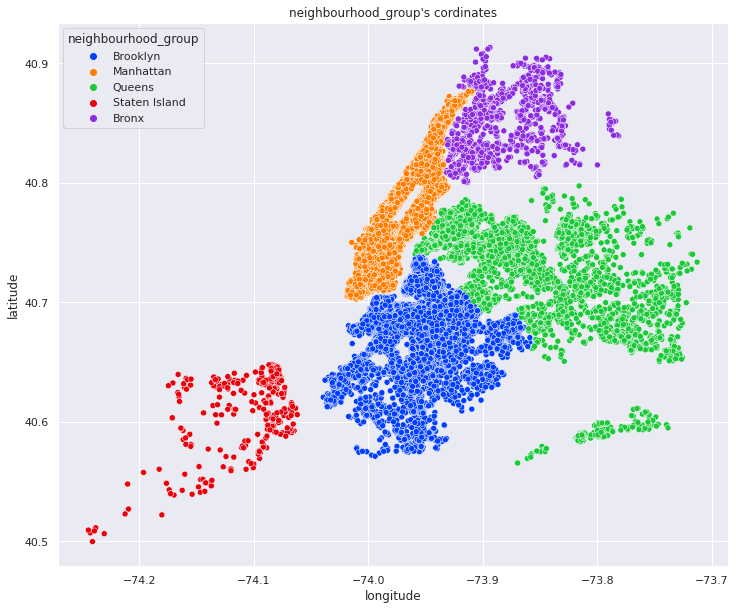

In [ ]:
# Locating various neighbourhood_groups via latitude and langitude:

sns.set(rc={"figure.figsize": (12, 10)})
ax= sns.scatterplot(data=df2, x="longitude", y="latitude",hue='neighbourhood_group', palette ='bright').set_title("neighbourhood_group's cordinates")
plt.show()


These **latitude** and **longitude** values can be really handy if someone really wants deep dive into the location stuff and look into the exact locations of these cities on the map in NYC !!



---



With this we come to the end of this basic analysis on **Airbnb NYC** ✈ ! \
surely a lot more analysis can be done here ....

## From what we have analyzed here's a **Detailed Conclusion:**



➤ First of all we saw the correlation between various columns using a heatmap to get a upper hand in our later analysis and found out that there's correlation among **host_id to reveiws_per_month** **&** **availability_365**. And there's noticiable correlation between **min_nights to no_of_listings_count & availability_365**. Price also shows some correlation with availability_365 & host_listings_count.



➤ Later, we saw was that a **single host** can **hold multiple properties** listed in the same as well as in different **Neighbourhood groups** with different **host id's** .... if someone wants to travel certain locations in NYC he/she can hire such host instead of looking for one host for each location !



➤ Living in **Manhattan** is the most expensive as it has an average price of **≈165** whereas it is lowest in **Bronx** i.e **≈82$**.

➤According to the availability and price mean graph **Bronx*,*Queens and *Staten* Island** best suited for customers whereas **Manhattan** is the least suitable because of its less availability and high price.


➤ **Queens** is the most reviewed **Neighbourhood group** in entire NYC with total reviews of **≈629** whereas **Bronx** is the least reviewed Neighbourhood group with **≈321** total reviews.

➤Reviews per Month is highest in **Manhattan** (might be because it has the highest listing) followed by **Bronx,Queens,Broonkyl** and at last **Staten Island** (has the least number of listing).




➤ About the hosts **Michael** holds the most number of listing properties in NYC i.e ≈407 followed by **David** with ≈390 listings.



➤ Even after holding the most number of listings **Dona** proves to be The People's Champ as he is **Most reviewed host** with **≈630** reviews followed by **Jj** with **≈607** reviews.


➤Density of Month graph showed that **JUNE** was the busiest month followed by **JULY** and **FEBRUARY** was the last.
Density of Year graph showed that **2019** was the busiest of all years whereas **2011** and **2012** were the least.



### ➤ **Total Percentage** of **each room type** in entire NYC is:
*   Entire home/apt = 51.3%
*   Private room = 46.3%
*   Shared room = 2.4%



### ➤ **Total Percentage** of **area under each neighbourhood group** in NYC is:
*   Manhattan = 43.7%
*   Brooklyn = 41.5%
*   Queens = 11.8%
*   Bronx = 2.3%
*   Staten island = 0.8%



###➤ **Total number** of **room_type** listings in **each neighbourhood_group**:
*   **Entire home/apt**        
1.   Manhattan ≈13000
2.   Brooklyn ≈9500
3.   Queens ≈2100
4.   Bronx ≈400
5.   Staten island ≈100
*   **Private room**
1.  Brooklyn ≈10000
2.  Manhattan ≈8000
3.  Queens ≈3500
4.  Bronx ≈800
5.  Staten island ≈200
*   **Shared room**
1.  Manhattan ≈500
2.  Brooklyn ≈300
3.  Queens ≈200
4.  Bronx and Staten island with almost negligible shared room type listings.



###➤ **Average minimum nights** spent in each **room_type** in each **neighbourhood_group**:
*   **Entire home/apt**
1.  Manhattan ≈11
2.  Brooklyn ≈7
3.  Staten island ≈7
4.  Bronx ≈7
5.  Quens ≈6
*   **Private room**
1.  Brooklyn ≈6
2.  Manhattan ≈6
3.  Queens ≈6
4.  Bronx ≈4
5.  Staten island ≈4
*   **Shared room**
1.  Brooklyn ≈8
2.  Manhattan ≈7
3.  Queens ≈5
4.  Bronx ≈4
5.  Staten island ≈3



###➤ **Average price** for **each room_type**  in **each neighbourhood_group**:
*   **Entire home/apt**
1.  Manhattan ≈206                
2.  Brooklyn ≈161                    
3.  Queens ≈140                       
4.  Staten island ≈125                
5.  Bronx ≈123                   
*   **Private room**
1.  Manhattan ≈104
2.  Brooklyn ≈72
3.  Queens ≈68
4.  Staten island ≈63
5.  Bronx ≈62
*   **Shared room**
1.  Manhattan ≈85
2.  Staten island ≈64
3.  Queens ≈51
4.  Brooklyn ≈50
5.  Bronx ≈48



###➤ **Average availability** of **each room_type** in **each neighbourhood_group**:
*   **Entire room/apt**
1.  Staten island ≈176 days
2.  Bronx ≈159 days
3.  Queens ≈131 days
4.  Manhattan ≈114 days
5.  Brooklyn ≈96 days
*   **Private room**
1.  Staten island ≈227 days
2.  Bronx ≈172 days
3.  Queens ≈150 days
4.  Manhattan ≈101 days
5.  Brooklyn ≈100
*   **Shared room**
1.  Queens ≈194 days
2.  Brooklyn ≈179 days
3.  Bronx ≈153 days
4.  Manhattan ≈140 days
5.  Staten island ≈72 days




➤ **Private Bedroom in Manhattan** is the most famous listing property as per total reviews **≈667** followed by **Room near JFK Queen Bed** with **≈630** total reviews.

➤On the basis of monthly reviews **Enjoy great views of the City in our Deluxe Room!** is at the top with a total of **≈59** reviews per month.


➤ Top neighbourhood is **Bedford-Stuyvesant** with total reviews of ≈109482

➤ Using **latitude** & **longitude** values we actually marked the position of each listing in **each neighbourhood_group** on the map \
of **New York City** !!











































































---



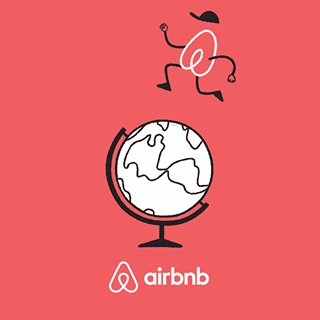

Thanks ✈